In [1]:
# Importing the requisite modules

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Reading all data into the program. 'c' before a year denotes it's cleaned data; 'r' denotes that it's raw in some way. 
# Most data was cleaned before import, but 2014 only had aggregrate totals, not indidvidual observations, so I will
# create a cleaned DataFrame object based on the aggregate data (which I'm treating as 'raw').

# Each survey had a few items unique to them. I kept only items present in each year's survey.

c2017 = pd.read_csv("2017_Cleaned.csv")
c2016 = pd.read_csv("2016_Cleaned.csv")
c2015 = pd.read_csv("2015_Cleaned.csv")
r2014 = pd.read_csv("2014_Cleaned.csv")

# 2014 and 2015 don't have the middle variable, 'MEH'. However, respondents were able to not reply JOY or DESPAIR to a candy
# for those years. This shouldn't hurt the analysis too much; realistically, many of the respondents who would have answered 
# 'MEH' in 2016/2017 would have not replied at all for that candy in 2014/2015. If we only look at JOY and DESPAIR responses,
# the change in survey should (hopefully!) not matter too much.

In [3]:
# Cleans r2014 -- removes all candy not counted in the cleaned files

count = -1
for row in r2014["ITEM"]:
    count += 1
    if row not in c2017.columns:
        r2014.drop(count, inplace=True)

r2014.index = range(0,len(r2014.index))

In [4]:
# establishes how many observations there needs to be for, and creates, c2014

maxlist = []
for row in range(0, len(r2014.index)):
    maxlist.append(r2014["JOY"][row]+r2014["DESPAIR"][row])

c2014 = pd.DataFrame(columns=c2017.columns,index=range(0,max(maxlist)))

In [5]:
# Fills c2014 with the correct observations. c2014 will have the correct number of observations, but not all rows will represent
# real respondents' answers, because for any given candy type, all the JOY entries will be clustered at the top of the table, 
# with all DESPAIR entries immediately below them.

for row in c2014.index:
    if row in r2014["ITEM"]:
        candy = r2014["ITEM"][row]
        joy = r2014["JOY"][row]
        despair = r2014["DESPAIR"][row]
        mainlist = []
        for x in range(joy):
            mainlist.append("JOY")
        for y in range(despair):
            mainlist.append("DESPAIR")
        residual = len(c2014[candy]) - len(mainlist)
        for z in range(residual):
            mainlist.append("NaN")
        c2014[candy] = mainlist
    else:
        continue

In [6]:
# Calculate total number of observations

totalObs = c2014.shape[0] + c2015.shape[0] + c2016.shape[0] + c2017.shape[0]

# Create new DataFrame, cAll, with all cleaned observations

cAll = pd.DataFrame(columns=c2014.columns, index = range(0, totalObs))
cAll

,Empty,100_Grand_Bar,Anonymous_brown_globs_that_come_in_black_and_orange_wrappers,Any_full-sized_candy_bar,Black_Jacks,Bonkers,Bottle_Caps,Broken_glow_stick,Cadbury_Creme_Eggs,Candy_Corn,...,Swedish_Fish,Those_odd_marshmallow_circus_peanut_things,Three_Musketeers,Tolberone_something_or_other,Trail_Mix,Twix,Vicodin,White_Bread,Whole_Wheat_anything,York_Peppermint_Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Populates cAll with the correct data

for column in cAll.columns:
    columnlist = c2014[column].append(c2015[column]).append(c2016[column]).append(c2017[column])
    columnlist.index = range(0, 9499)
    cAll[column] = columnlist

cAll

,Empty,100_Grand_Bar,Anonymous_brown_globs_that_come_in_black_and_orange_wrappers,Any_full-sized_candy_bar,Black_Jacks,Bonkers,Bottle_Caps,Broken_glow_stick,Cadbury_Creme_Eggs,Candy_Corn,...,Swedish_Fish,Those_odd_marshmallow_circus_peanut_things,Three_Musketeers,Tolberone_something_or_other,Trail_Mix,Twix,Vicodin,White_Bread,Whole_Wheat_anything,York_Peppermint_Patties
0,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
1,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
2,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
3,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
4,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,1,JOY,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,...,JOY,DESPAIR,JOY,JOY,JOY,JOY,MEH,MEH,MEH,JOY
9495,1,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,DESPAIR,MEH
9496,1,MEH,DESPAIR,JOY,NaN,NaN,NaN,DESPAIR,JOY,JOY,...,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,NaN,DESPAIR,MEH,JOY
9497,1,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,JOY,DESPAIR,...,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH


In [8]:
# Create the Joy Index, the final DataFrame with the sum total of JOY and DESPAIR entries for each candy type.

joyIndex = pd.DataFrame(columns=["JOY", "DESPAIR", "JOY_INDEX_ADDITIVE", "JOY_INDEX_RATIO"],index=cAll.columns[1:])

# Populates the Joy Index with an additive joy index (number of "JOY" responses minus those replying "DESPAIR")
# and a ratio joy index (number of "JOY" responses divided by number of "DESPAIR" responses).

for candy in joyIndex.index:
    joyIndex["JOY"][candy] = sum(cAll[candy] == "JOY")
    joyIndex["DESPAIR"][candy] = sum(cAll[candy] == "DESPAIR")
    joyIndex["JOY_INDEX_ADDITIVE"][candy] = (joyIndex["JOY"][candy] - joyIndex["DESPAIR"][candy])
    joyIndex["JOY_INDEX_RATIO"][candy] = (joyIndex["JOY"][candy] / joyIndex["DESPAIR"][candy])

# Displaying the Joy Index, sorted so that the higher additive values appear first. As can be seen, the worst performers in
# this category aren't really candy at all. Cheap candy, retainers, and even broken glow sticks--of course no one's going to
# say they're happy to get those!

joyIndex.sort_values("JOY_INDEX_ADDITIVE", ascending=False)

,JOY,DESPAIR,JOY_INDEX_ADDITIVE,JOY_INDEX_RATIO
Any_full-sized_candy_bar,8417,420,7997,20.0405
Kit_Kat,8146,612,7534,13.3105
Twix,7760,794,6966,9.7733
Snickers,7730,860,6870,8.98837
"Cash,_or_other_forms_of_legal_tender",7456,1116,6340,6.681
...,...,...,...,...
White_Bread,354,7602,-7248,0.0465667
Dental_paraphenalia,588,7881,-7293,0.0746098
Gum_from_baseball_cards,378,7812,-7434,0.0483871
Candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants,327,7876,-7549,0.0415185


Text(0.5, 0, '\nJoy Index Ratio Frequencies')

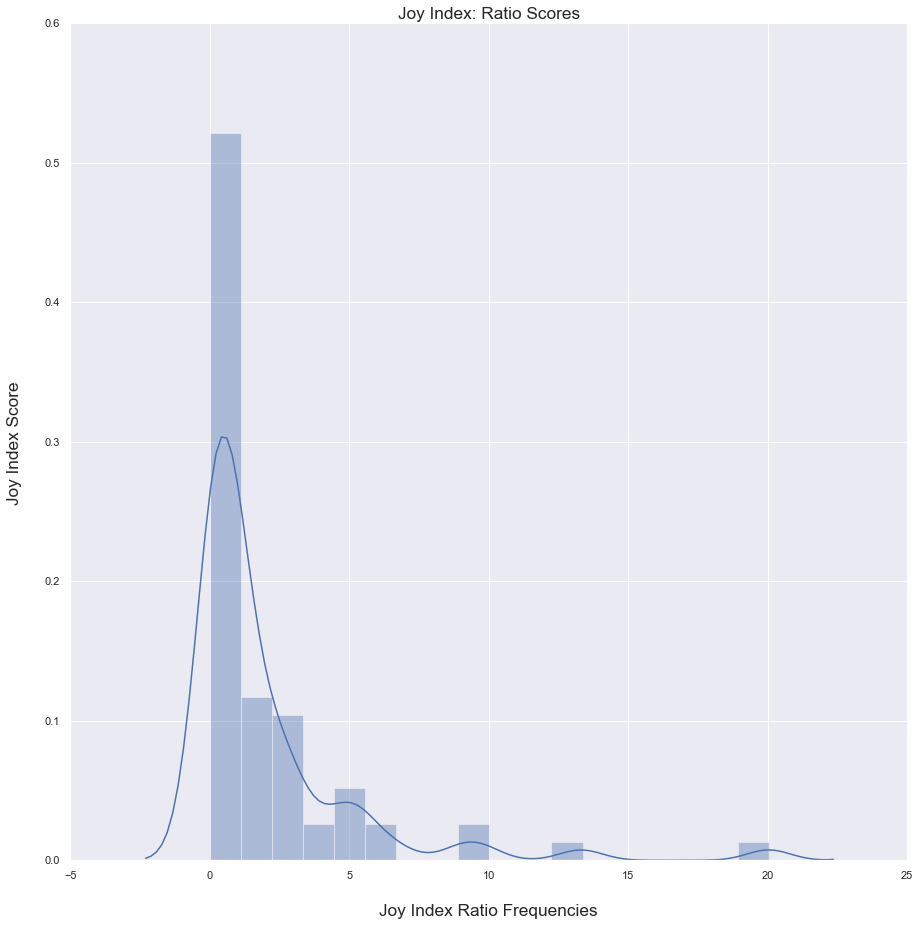

In [9]:
# Plotting the ratio index. It's not very helpful, because all negative values for the additive joy index will cluster
# right above zero, heavily skewing the graph.

fig, ax = plt.subplots(figsize = (15, 15))
sns.set_style("darkgrid")
sns.axes_style("whitegrid")

sns.distplot(joyIndex.JOY_INDEX_RATIO)

plt.title("Joy Index: Ratio Scores",size="x-large")
ax.set_ylabel('Joy Index Score\n',size="x-large")
ax.set_xlabel('\nJoy Index Ratio Frequencies',size="x-large")

Text(0.5, 0, '\nCandy')

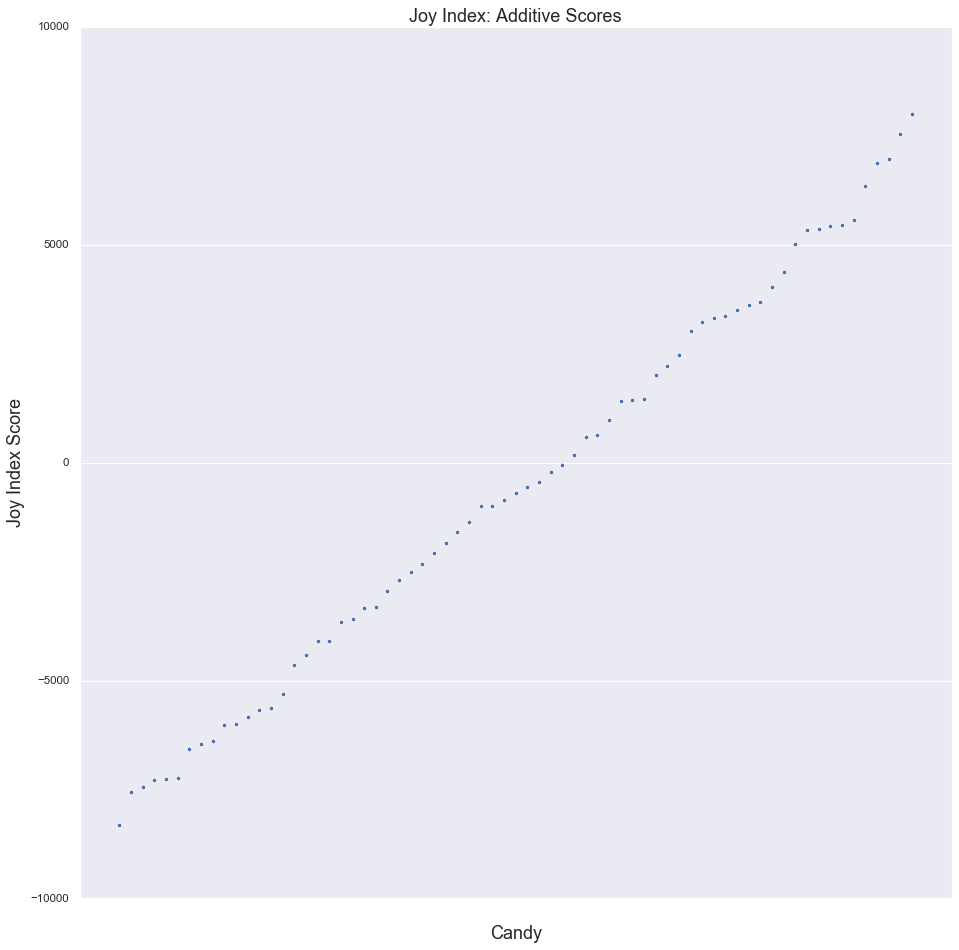

In [10]:
# Plotting the additive index. This visualization is much more useful for seeing there's a fairly steady increase in the
# additive index between any two subsequent items.

fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=75)


sns.scatterplot(data=joyIndex.sort_values("JOY_INDEX_ADDITIVE").JOY_INDEX_ADDITIVE)

plt.title("Joy Index: Additive Scores",size="x-large")
plt.xticks(ticks=[])
ax.set_ylabel('Joy Index Score',size="x-large")
ax.set_xlabel('\nCandy',size="x-large")

In [11]:
# So what did we learn? 

# The result of four years' worth of surveys, completed by almost 10,000 respondents, suggests that there is a measurable 
# difference in candy preferences. We can't say much with this data--however, what would happen if we took the time to identify 
# key features of the different candy types? If we measured things like sugar/caloric content, the presence of common features 
# (nougat, nuts, chocolate or caramel, etc.) and ran regression analyses, would we be able to determine what makes the most 
# popular kind of candy, and eventually create the ultimate candy bar?